In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

%matplotlib inline

In [ ]:
# Displaying the statistics of the dataset

# dataset visualization
import matplotlib.pyplot as plt
import os
import glob

data_dir = '/content/drive/MyDrive/tents.v1i.yolov8-obb'

train_dir = data_dir + '/train/images/'
test_dir = data_dir + '/test/images/'
valid_dir = data_dir + '/valid/images/'

print("Number of images in train dataset : ", len(os.listdir(train_dir)))
print("Number of images in test dataset : ", len(os.listdir(test_dir)))
print("Number of images in valid dataset : ", len(os.listdir(valid_dir)))

Number of images in train dataset :  536
Number of images in test dataset :  40
Number of images in valid dataset :  60


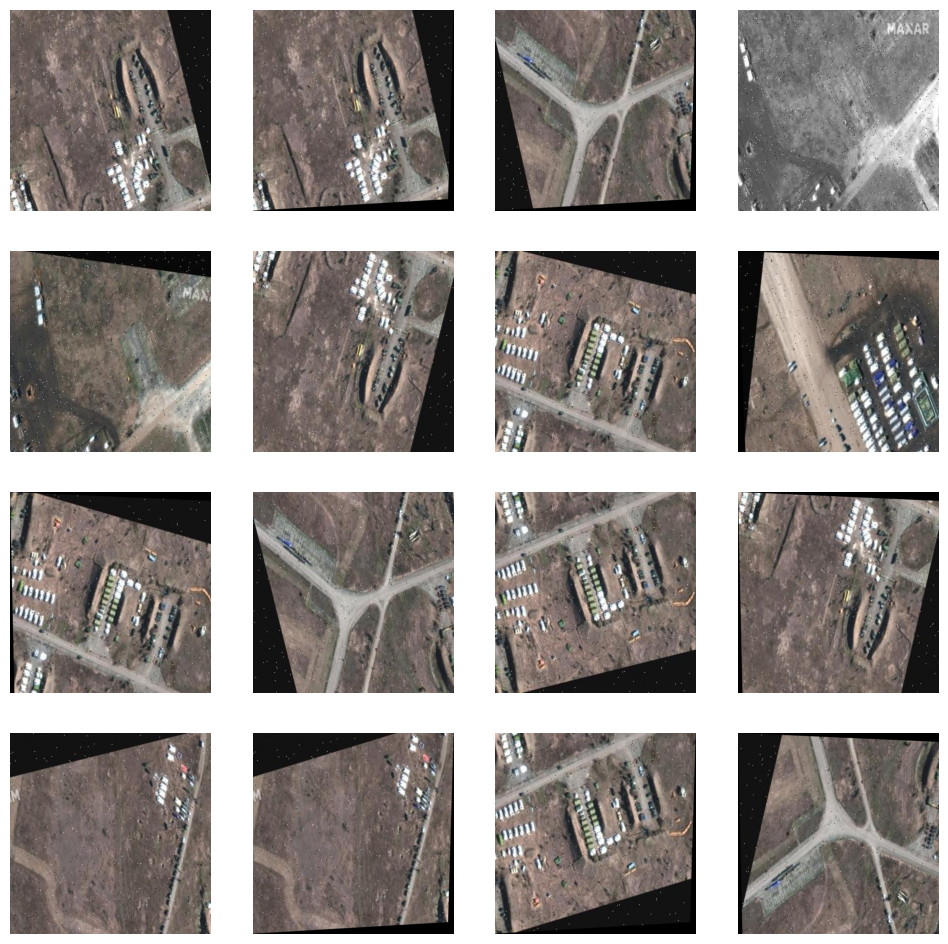

In [ ]:
# Visualizing the dataset images
import matplotlib.pyplot as plt

train_images = os.listdir(train_dir)
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4,4,i+1)
    image = plt.imread(os.path.join(train_dir, train_images[i]))
    plt.imshow(image)
    plt.axis(False)

plt.show()

In [ ]:
# Displaying the image details

image = cv2.imread("/content/drive/MyDrive/tents.v1i.yolov8-obb/train/images/original-1-_jpg.rf.4c8ec50821e09082e348988bf689784c.jpg")

height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


In [ ]:
# Preprocessing the image

def Preprocess(img):
  normalized_img = img.astype('float32')/255.0
  return normalized_img

In [ ]:
#Creating the model for Detection

def yolo_model():
  model = YOLO('yolov8x-obb.pt')
  return model

In [ ]:
model = yolo_model()

100%|██████████| 133M/133M [00:01<00:00, 128MB/s]


In [ ]:
results = model.train(data='/content/drive/MyDrive/tents.v1i.yolov8-obb/data.yaml',
                      epochs=20,
                      momentum=0.937,
                      weight_decay=0.0005,
                      imgsz=640,
                      batch=16,
                      freeze=10,
                      lr0=0.001,
                      workers=8)

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=obb, mode=train, model=yolov8x-obb.pt, data=/content/drive/MyDrive/tents.v1i.yolov8-obb/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

train: Scanning /content/drive/MyDrive/tents.v1i.yolov8-obb/train/labels.cache... 536 images, 232 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/tents.v1i.yolov8-obb/valid/labels.cache... 60 images, 24 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/obb/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 103 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.23G      1.888      2.605      1.587         61        640: 100%|██████████| 34/34 [00:32<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]

                   all         60        472      0.339      0.688      0.291      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.11G      1.543      1.464       1.42         38        640: 100%|██████████| 34/34 [00:26<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         60        472     0.0525      0.756     0.0466     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.09G      1.436       1.21      1.373         82        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all         60        472       0.71      0.736      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.11G      1.516      1.208      1.389         57        640: 100%|██████████| 34/34 [00:27<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all         60        472      0.843       0.73      0.818       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      5.96G      1.446      1.089      1.337         57        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all         60        472      0.803      0.771        0.8      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.83G      1.363      1.008      1.348         48        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all         60        472      0.844      0.765      0.831      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.31G      1.349      1.035      1.347         97        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         60        472      0.856      0.781      0.842      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      5.91G      1.246     0.9055      1.275         93        640: 100%|██████████| 34/34 [00:27<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all         60        472      0.852       0.79      0.853      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.92G      1.296     0.9088      1.296         18        640: 100%|██████████| 34/34 [00:27<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         60        472        0.9      0.807      0.872      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      5.85G      1.277      0.877      1.287         50        640: 100%|██████████| 34/34 [00:27<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         60        472      0.881      0.782      0.873      0.592


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.35G      1.208     0.8449      1.341         46        640: 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all         60        472      0.909      0.788      0.853      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.09G      1.213     0.8276      1.321         43        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         60        472      0.899      0.814      0.867      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      5.97G      1.182     0.7726      1.368         35        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         60        472      0.919      0.795       0.88      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.08G      1.171     0.7358      1.351         20        640: 100%|██████████| 34/34 [00:27<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         60        472      0.897       0.82      0.869      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      5.93G      1.125      0.718      1.271         39        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all         60        472      0.914      0.839      0.895      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      5.84G      1.128     0.7092       1.26         33        640: 100%|██████████| 34/34 [00:27<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all         60        472      0.934      0.775      0.877      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      5.93G      1.117     0.7171      1.321         51        640: 100%|██████████| 34/34 [00:26<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all         60        472      0.915      0.824       0.89      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.07G       1.06     0.6715      1.283         34        640: 100%|██████████| 34/34 [00:27<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all         60        472      0.921      0.805      0.882       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      5.93G      1.036     0.6576      1.226         67        640: 100%|██████████| 34/34 [00:27<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all         60        472       0.91      0.819      0.887      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.06G      1.027     0.6304      1.245         16        640: 100%|██████████| 34/34 [00:27<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all         60        472      0.921      0.815      0.889      0.627



20 epochs completed in 0.222 hours.
Optimizer stripped from runs/obb/train2/weights/last.pt, 139.6MB
Optimizer stripped from runs/obb/train2/weights/best.pt, 139.6MB

Validating runs/obb/train2/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-obb summary (fused): 287 layers, 69,450,054 parameters, 0 gradients, 263.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


                   all         60        472       0.92      0.818      0.889      0.627
Speed: 0.3ms preprocess, 28.8ms inference, 0.0ms loss, 15.1ms postprocess per image
Results saved to runs/obb/train2


In [ ]:
metrics=model.val(data="/content/drive/MyDrive/datasettent/data.yaml")
print(metrics)

Ultralytics YOLOv8.2.60 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-obb summary (fused): 287 layers, 69,450,054 parameters, 0 gradients, 263.2 GFLOPs


val: Scanning /content/drive/MyDrive/datasettent/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.00s/it]


                   all         10        336      0.854      0.824      0.868      0.537
Speed: 0.4ms preprocess, 88.1ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs/obb/train2
ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b4d86c20310>
curves: []
curves_results: []
fitness: 0.5702864940825112
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.53724])
names: {0: 'tent'}
plot: True
results_dict: {'metrics/precision(B)': 0.8535175593786141, 'metrics/recall(B)': 0.8244047619047619, 'metrics/mAP50(B)': 0.8676730610790578, 'metrics/mAP50-95(B)': 0.537243542194006, 'fitness': 0.5702864940825112}
save_dir: PosixPath('runs/obb/train2')
speed: {'preprocess': 0.3724336624145508, 'inference': 88.1413459777832, 'loss': 0.0010251998901367188, 'postpro

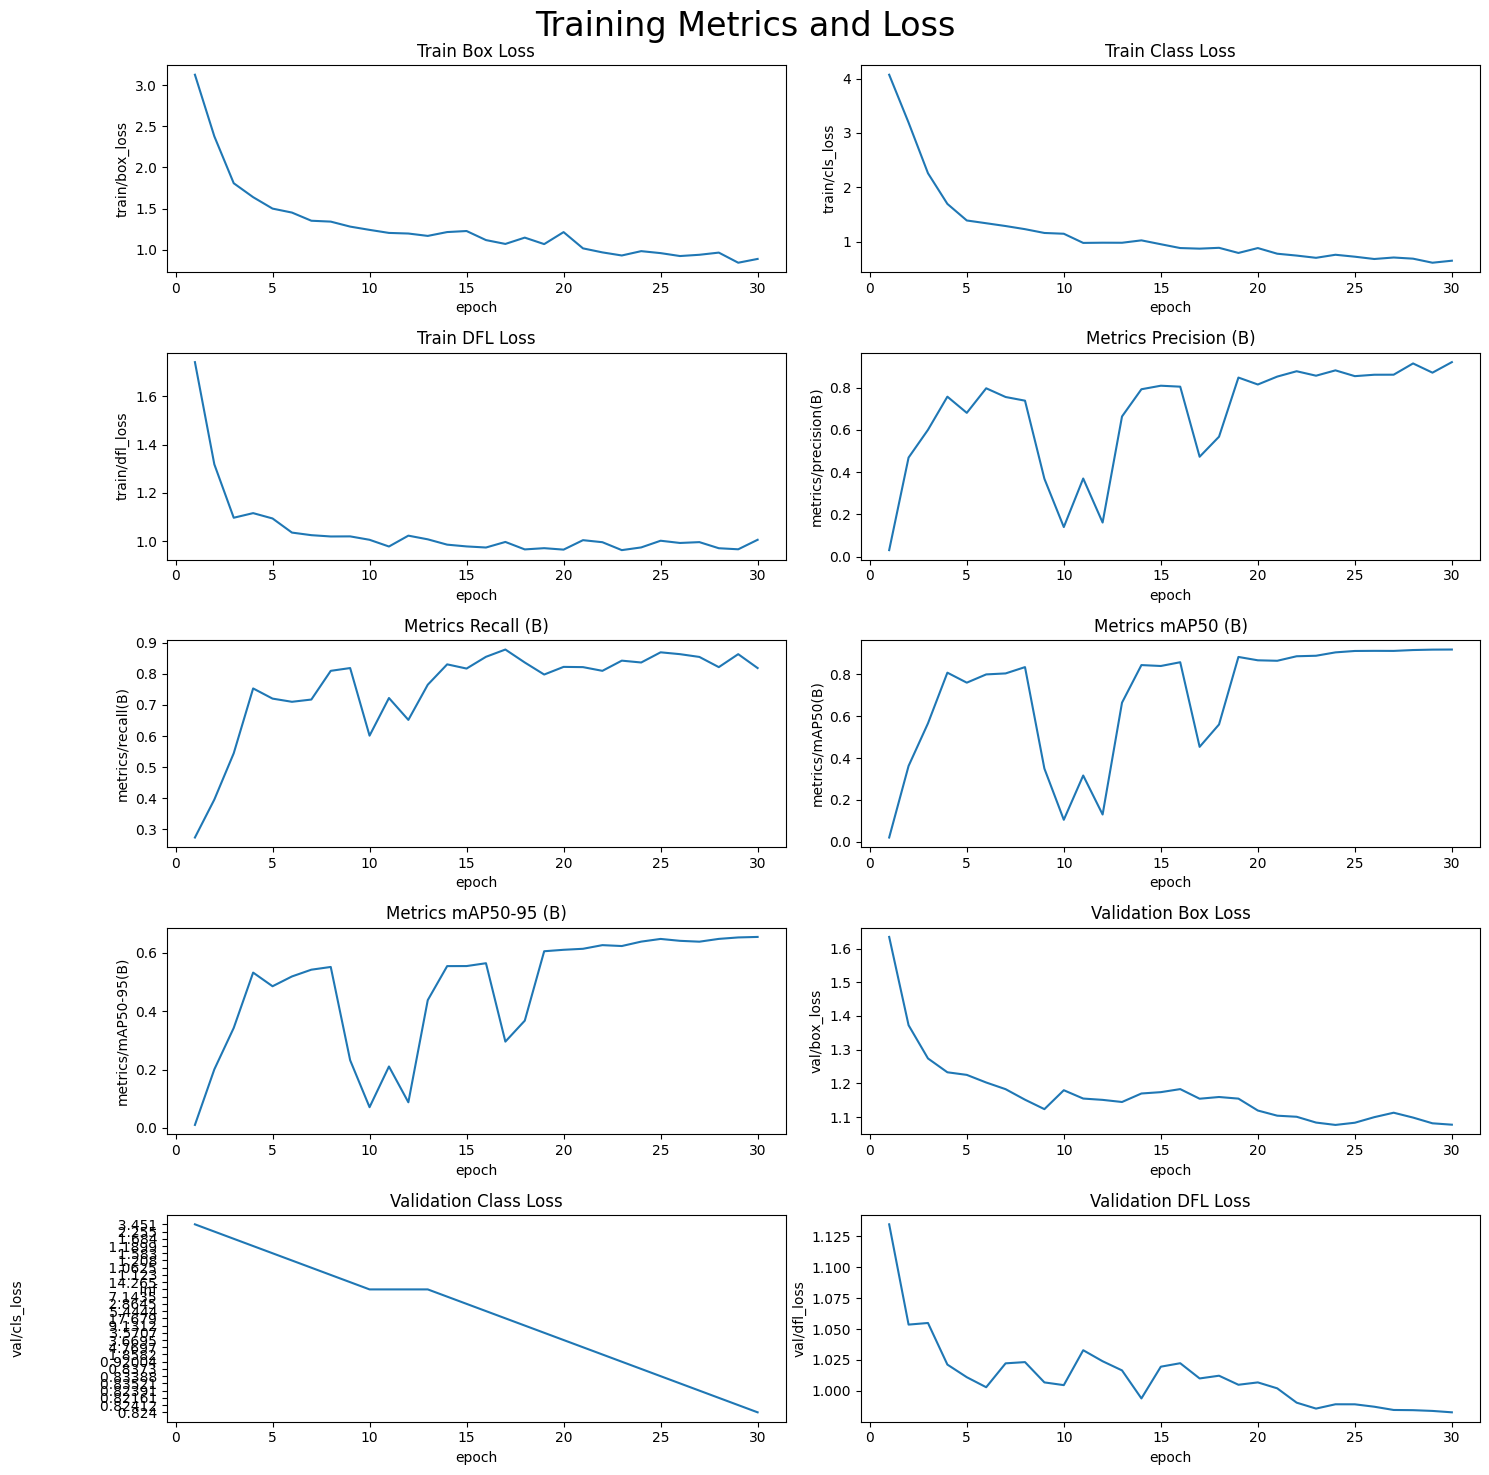

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/runs/obb/train/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/obb/train/weights/best.pt')

# # Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.55 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-obb summary (fused): 287 layers, 69,450,054 parameters, 0 gradients, 263.2 GFLOPs


val: Scanning /content/drive/MyDrive/datasettent/test/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:03<00:00,  1.03it/s]

val: New cache created: /content/drive/MyDrive/datasettent/test/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


                   all          4        108      0.615      0.148      0.384      0.247
Speed: 0.4ms preprocess, 103.9ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/obb/val


(-0.5, 2999.5, 2249.5, -0.5)

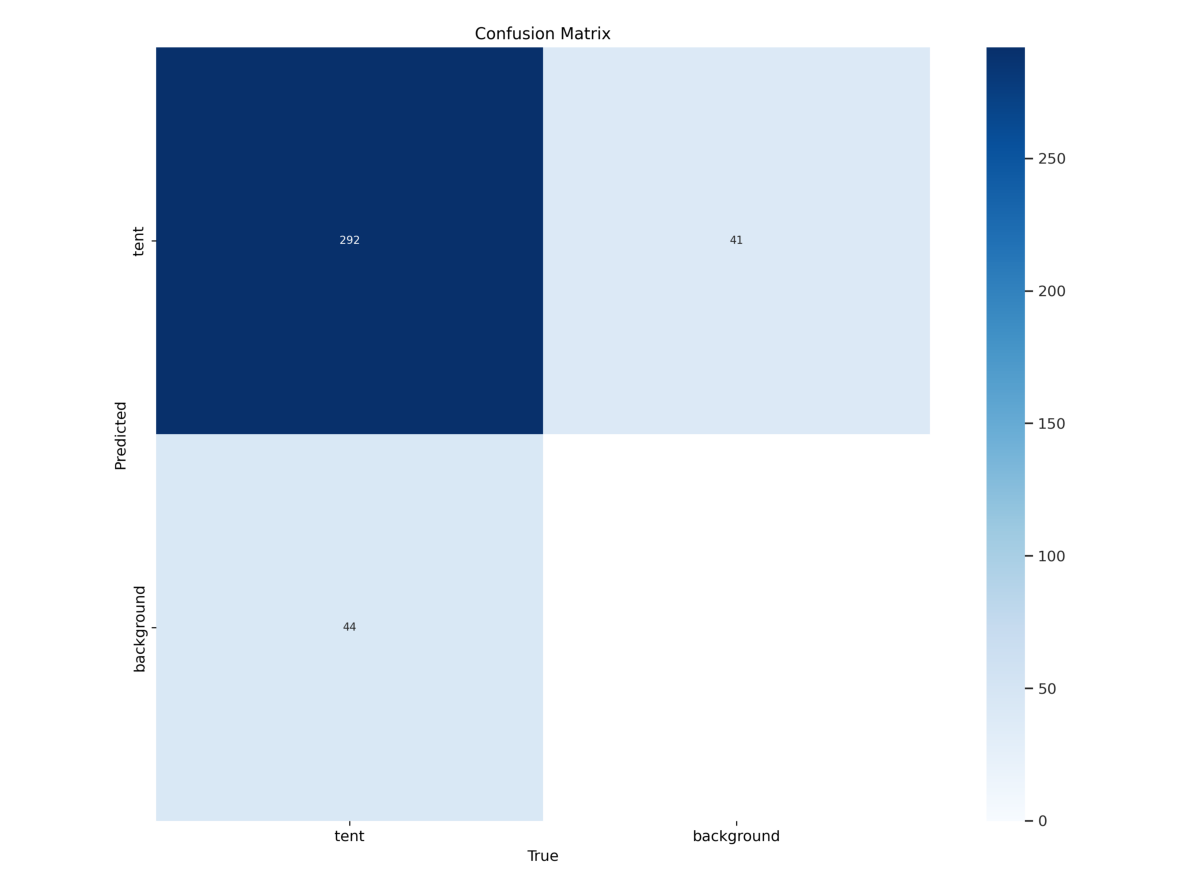

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/obb/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off')

In [ ]:
# Values from the confusion matrix
TP = 292 # True Positives
TN = 0  # True Negatives
FP = 44   # False Positives
FN = 41    # False Negatives

# Calculating precision
precision = TP / (TP + FP)

# Calculating accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Precision:", precision*100)
print("Accuracy:", accuracy*100)


Precision: 86.90476190476191
Accuracy: 77.45358090185677


In [ ]:
# Function to perform tent detections
def tent_detect(img):
    detect_result = model(img)
    detect_img = detect_result[0].plot()
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 76.6ms
Speed: 3.7ms preprocess, 76.6ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)


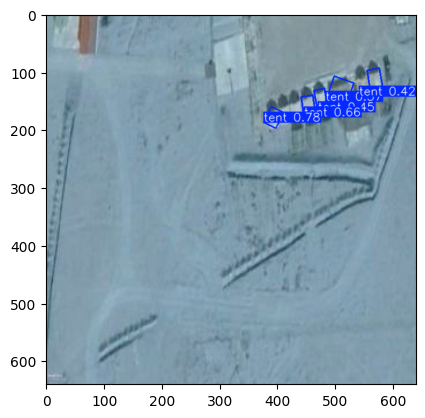

In [ ]:
model = YOLO("/content/runs/obb/train2/weights/best.pt")
img_path = '/content/drive/MyDrive/tents.v1i.yolov8-obb/test/images/original-3-_jpg.rf.dad6bf15d152f461603687a497744e12.jpg'
img = plt.imread(img_path)
result = tent_detect(img)
plt.imshow(result)